# Requirements

In [1]:
# Add as many imports as you need.
# Add as many imports as you need.
# Add as many imports as you need.
import pandas as pd

from VNP.packages.data_alalysis import *
from VNP.packages.data_preperation import *
from VNP.packages.missing_values import *
from VNP.packages.visualization import *
from VNP.packages.models import *
from VNP.packages.evaluation import *
from VNP.packages.vnp_ez import *
%load_ext autoreload
%autoreload 2


# Laboratory Exercise - Run Mode (8 points)

In [2]:
from keras.api.models import Sequential
from keras.api.layers import Input, LSTM, Dense
import keras

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **mean temperature** in the city of Delhi. Your task involves employing bagging and boosting methods to forecast the **mean temperature**. To accomplish this use data from the preceding three days, consisting of **mean temperature**, **humidity**, **wind speed**, and **mean pressure**.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [5]:
import pandas as pd

# Write your code here. Add as many boxes as you need.
df = pd.read_csv("../data/climate-data.csv")

Explore the dataset using visualizations of your choice.

In [6]:
# Write your code here. Add as many boxes as you need.
missing_table(df)

,Feature,CountMissing,PercentageMissing,Total
0,date,0,0.0,1462
1,meantemp,0,0.0,1462
2,humidity,0,0.0,1462
3,wind_speed,0,0.0,1462
4,meanpressure,0,0.0,1462


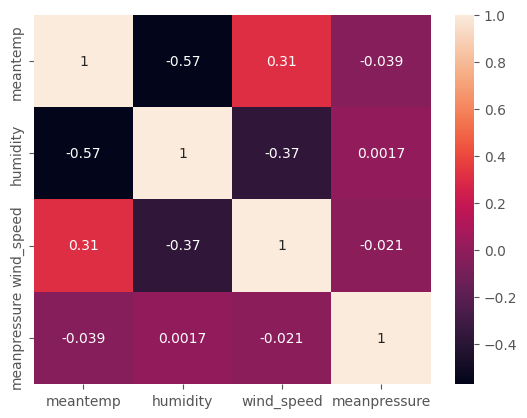

In [7]:
correlation_map(df)

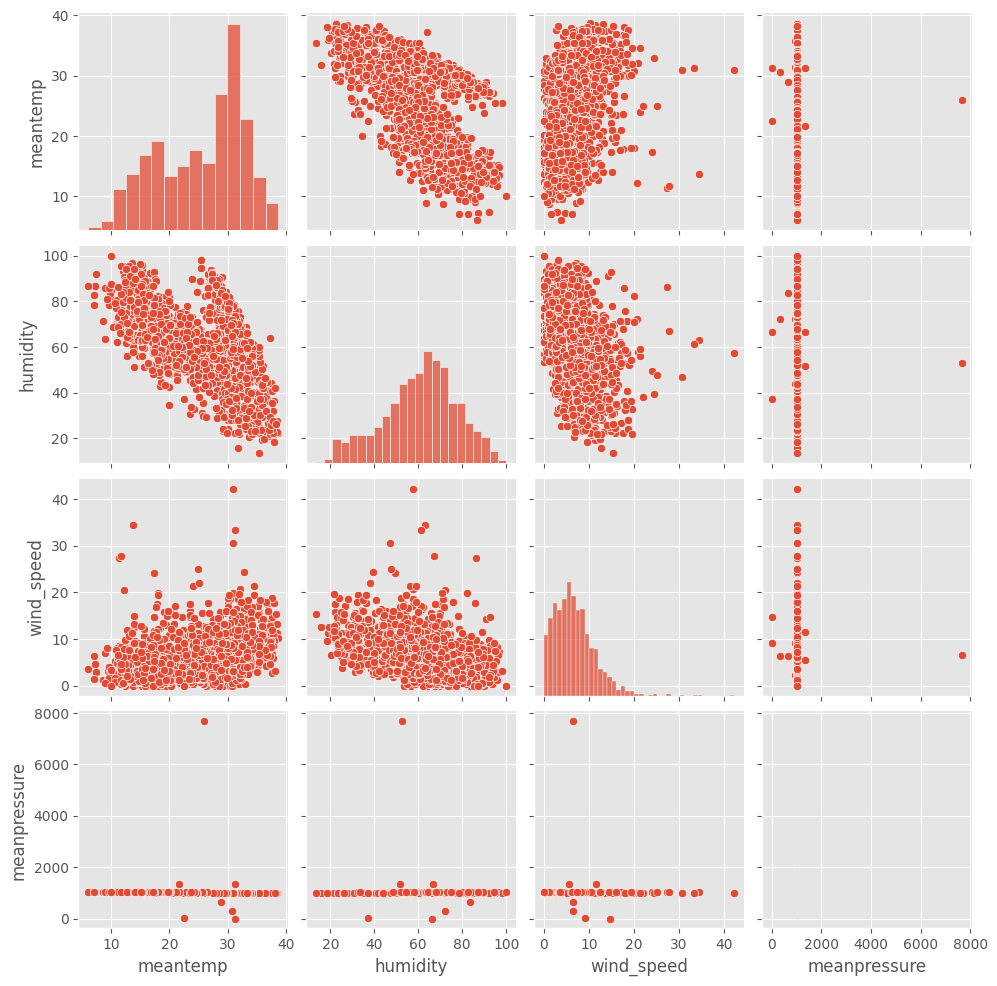

In [8]:
sns.pairplot(df)

In [9]:
df_1 = to_time_series(df,time_feature="date", auto_sort=True)

In [10]:
df_1

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [115]:
Q1 = df_1["meanpressure"].quantile(0.25)
Q3 = df_1["meanpressure"].quantile(0.27)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filltered = df_1[(df_1["meanpressure"] > lower_bound) & (df_1["meanpressure"] < upper_bound)]

<Axes: ylabel='meanpressure'>

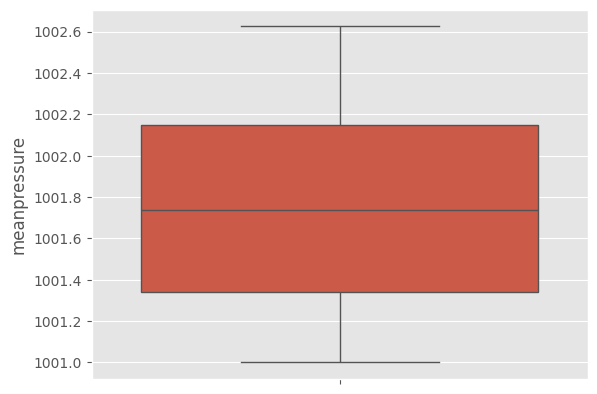

In [117]:
sns.boxplot(filltered["meanpressure"])

# Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [11]:
lag = 3;

In [13]:
# Write your code here. Add as many boxes as you need.
df_2, features =  auto_shift(df_1, lag, features_to_shift=df_1.columns, auto_drop_na=True, return_features=True)

In [14]:
df_2

,meantemp,humidity,wind_speed,meanpressure,meantemp_prev_3,meantemp_prev_2,meantemp_prev_1,humidity_prev_3,humidity_prev_2,humidity_prev_1,wind_speed_prev_3,wind_speed_prev_2,wind_speed_prev_1,meanpressure_prev_3,meanpressure_prev_2,meanpressure_prev_1
date,,,,,,,,,,,,,,,,
2013-01-04,8.666667,71.333333,1.233333,1017.166667,10.000000,7.400000,7.166667,84.500000,92.000000,87.000000,0.000000,2.980000,4.633333,1015.666667,1017.800000,1018.666667
2013-01-05,6.000000,86.833333,3.700000,1016.500000,7.400000,7.166667,8.666667,92.000000,87.000000,71.333333,2.980000,4.633333,1.233333,1017.800000,1018.666667,1017.166667
2013-01-06,7.000000,82.800000,1.480000,1018.000000,7.166667,8.666667,6.000000,87.000000,71.333333,86.833333,4.633333,1.233333,3.700000,1018.666667,1017.166667,1016.500000
2013-01-07,7.000000,78.600000,6.300000,1020.000000,8.666667,6.000000,7.000000,71.333333,86.833333,82.800000,1.233333,3.700000,1.480000,1017.166667,1016.500000,1018.000000
2013-01-08,8.857143,63.714286,7.142857,1018.714286,6.000000,7.000000,7.000000,86.833333,82.800000,78.600000,3.700000,1.480000,6.300000,1016.500000,1018.000000,1020.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217,14.000000,17.142857,16.850000,94.300000,74.857143,67.550000,9.085000,8.784211,8.335000,1014.350000,1016.952381,1017.200000
2016-12-29,15.238095,87.857143,6.000000,1016.904762,17.142857,16.850000,17.217391,74.857143,67.550000,68.043478,8.784211,8.335000,3.547826,1016.952381,1017.200000,1015.565217
2016-12-30,14.095238,89.666667,6.266667,1017.904762,16.850000,17.217391,15.238095,67.550000,68.043478,87.857143,8.335000,3.547826,6.000000,1017.200000,1015.565217,1016.904762


In [15]:
df_3 = df_2.drop(columns = ["humidity", "wind_speed", "meanpressure"])

In [16]:
df_3

,meantemp,meantemp_prev_3,meantemp_prev_2,meantemp_prev_1,humidity_prev_3,humidity_prev_2,humidity_prev_1,wind_speed_prev_3,wind_speed_prev_2,wind_speed_prev_1,meanpressure_prev_3,meanpressure_prev_2,meanpressure_prev_1
date,,,,,,,,,,,,,
2013-01-04,8.666667,10.000000,7.400000,7.166667,84.500000,92.000000,87.000000,0.000000,2.980000,4.633333,1015.666667,1017.800000,1018.666667
2013-01-05,6.000000,7.400000,7.166667,8.666667,92.000000,87.000000,71.333333,2.980000,4.633333,1.233333,1017.800000,1018.666667,1017.166667
2013-01-06,7.000000,7.166667,8.666667,6.000000,87.000000,71.333333,86.833333,4.633333,1.233333,3.700000,1018.666667,1017.166667,1016.500000
2013-01-07,7.000000,8.666667,6.000000,7.000000,71.333333,86.833333,82.800000,1.233333,3.700000,1.480000,1017.166667,1016.500000,1018.000000
2013-01-08,8.857143,6.000000,7.000000,7.000000,86.833333,82.800000,78.600000,3.700000,1.480000,6.300000,1016.500000,1018.000000,1020.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,14.000000,17.142857,16.850000,94.300000,74.857143,67.550000,9.085000,8.784211,8.335000,1014.350000,1016.952381,1017.200000
2016-12-29,15.238095,17.142857,16.850000,17.217391,74.857143,67.550000,68.043478,8.784211,8.335000,3.547826,1016.952381,1017.200000,1015.565217
2016-12-30,14.095238,16.850000,17.217391,15.238095,67.550000,68.043478,87.857143,8.335000,3.547826,6.000000,1017.200000,1015.565217,1016.904762


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [18]:
# Write your code here. Add as many boxes as you need.
x,y = get_x_and_y(df_3, target_column="meantemp")

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [22]:
x_train_scaled, x_test_scaled, x_scaler = scale_data(x_train, x_test, strategy="minmax")

In [23]:
x_train_scaled

,meantemp_prev_3,meantemp_prev_2,meantemp_prev_1,humidity_prev_3,humidity_prev_2,humidity_prev_1,wind_speed_prev_3,wind_speed_prev_2,wind_speed_prev_1,meanpressure_prev_3,meanpressure_prev_2,meanpressure_prev_1
date,,,,,,,,,,,,
2013-01-04,0.122271,0.042795,0.035662,0.840372,0.929054,0.869932,0.000000,0.070583,0.109743,0.768116,0.835573,0.862978
2013-01-05,0.042795,0.035662,0.081514,0.929054,0.869932,0.684685,0.070583,0.109743,0.029212,0.835573,0.862978,0.815547
2013-01-06,0.035662,0.081514,0.000000,0.869932,0.684685,0.867962,0.109743,0.029212,0.087636,0.862978,0.815547,0.794466
2013-01-07,0.081514,0.000000,0.030568,0.684685,0.867962,0.820270,0.029212,0.087636,0.035054,0.815547,0.794466,0.841897
2013-01-08,0.000000,0.030568,0.030568,0.867962,0.820270,0.770608,0.087636,0.035054,0.149218,0.794466,0.841897,0.905138
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-11,0.532751,0.550218,0.597980,0.553209,0.521854,0.520376,0.159708,0.222051,0.189040,0.640881,0.654150,0.689723
2016-03-12,0.550218,0.597980,0.582824,0.521854,0.520376,0.642905,0.222051,0.189040,0.155061,0.654150,0.689723,0.669038
2016-03-13,0.597980,0.582824,0.567413,0.520376,0.642905,0.632707,0.189040,0.155061,0.224716,0.689723,0.669038,0.575099


In [24]:
x_test_scaled

,meantemp_prev_3,meantemp_prev_2,meantemp_prev_1,humidity_prev_3,humidity_prev_2,humidity_prev_1,wind_speed_prev_3,wind_speed_prev_2,wind_speed_prev_1,meanpressure_prev_3,meanpressure_prev_2,meanpressure_prev_1
date,,,,,,,,,,,,
2016-03-16,0.557860,0.500546,0.552256,0.612014,0.621622,0.538063,0.162097,0.148626,0.204800,0.626482,0.725296,0.742819
2016-03-17,0.500546,0.552256,0.548308,0.621622,0.538063,0.476774,0.148626,0.204800,0.257727,0.725296,0.742819,0.677866
2016-03-18,0.552256,0.548308,0.620906,0.538063,0.476774,0.436128,0.204800,0.257727,0.162097,0.742819,0.677866,0.602767
2016-03-19,0.548308,0.620906,0.617085,0.476774,0.436128,0.565456,0.257727,0.162097,0.158989,0.677866,0.602767,0.583004
2016-03-20,0.620906,0.617085,0.635371,0.436128,0.565456,0.572635,0.162097,0.158989,0.084760,0.602767,0.583004,0.564088
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,0.244541,0.340611,0.331659,0.956250,0.726351,0.639949,0.215182,0.208058,0.197418,0.726482,0.808771,0.816601
2016-12-29,0.340611,0.331659,0.342890,0.726351,0.639949,0.645784,0.208058,0.197418,0.084032,0.808771,0.816601,0.764908
2016-12-30,0.331659,0.342890,0.282387,0.639949,0.645784,0.880068,0.197418,0.084032,0.142113,0.816601,0.764908,0.807265


In [39]:
y_train_scaled, y_test_scaled, y_scaler = scale_data(y_train, y_test, strategy="minmax", scaling_y=True)

In [26]:
y_train_scaled

date
2013-01-04    0.081514
2013-01-05    0.000000
2013-01-06    0.030568
2013-01-07    0.030568
2013-01-08    0.087336
                ...   
2016-03-11    0.582824
2016-03-12    0.567413
2016-03-13    0.557860
2016-03-14    0.500546
2016-03-15    0.552256
Name: meantemp, Length: 1167, dtype: float64

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [82]:
# Write your code here. Add as many boxes as you need.
x_train_scaled_reshaped = reshape_for_lstm(x_train_scaled, lag)

In [83]:
x_train_scaled_reshaped.shape

(1167, 3, 4)

In [84]:
x_test_scaled_reshaped = x_test_scaled.to_numpy().reshape(x_test_scaled.shape[0], lag, x_test_scaled.shape[1] // lag )

In [85]:
x_test_scaled_reshaped.shape

(292, 3, 4)

Use the trained model to make predictions for the test set.

In [95]:
# Write your code here. Add as many boxes as you need.
model = Sequential([
    Input((x_train_scaled_reshaped.shape[1], x_train_scaled_reshaped.shape[2],)),
    LSTM(64, activation="relu", return_sequences=True),
    LSTM(32, activation="relu"),
    Dense(1, activation="linear")
])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 3, 64)          │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,113 (117.63 KB)

 Trainable params: 30,113 (117.63 KB)

 Non-trainable params: 0 (0.00 B)

In [96]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

In [97]:
history = model.fit(x_train_scaled_reshaped, y_train_scaled, validation_split=0.20, epochs=32, batch_size=64, shuffle=False)


Epoch 1/32
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.3484 - mean_squared_error: 0.3484 - val_loss: 0.2377 - val_mean_squared_error: 0.2377
Epoch 2/32
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2655 - mean_squared_error: 0.2655 - val_loss: 0.1353 - val_mean_squared_error: 0.1353
Epoch 3/32
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1387 - mean_squared_error: 0.1387 - val_loss: 0.0294 - val_mean_squared_error: 0.0294
Epoch 4/32
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0496 - mean_squared_error: 0.0496 - val_loss: 0.0400 - val_mean_squared_error: 0.0400
Epoch 5/32
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0482 - mean_squared_error: 0.0482 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 6/32
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.0263 - val_mean_squared_error: 0.0263
Epoch 7/32
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0352 - mean_squared_error: 0.0352 - val_loss: 0.0208 - val_mean

<Axes: >

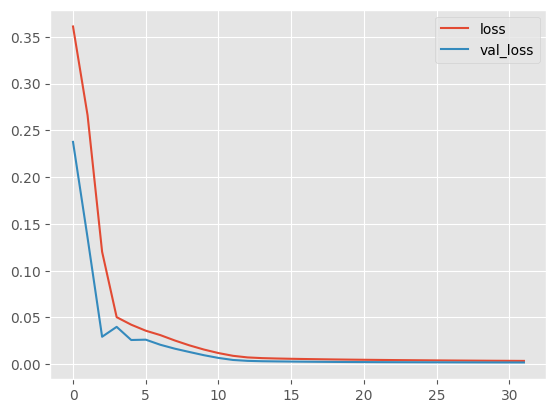

In [98]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [99]:
# Write your code here. Add as many boxes as you need.
pred_y_scaled = model.predict(x_test_scaled_reshaped)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [100]:
pred_y = y_scaler.inverse_transform(pred_y_scaled)

In [101]:
regression_report(y_test, pred_y)

Regression Report:
Mean Square Error: 10072.859460270305
R2 Score: -313.467050592279


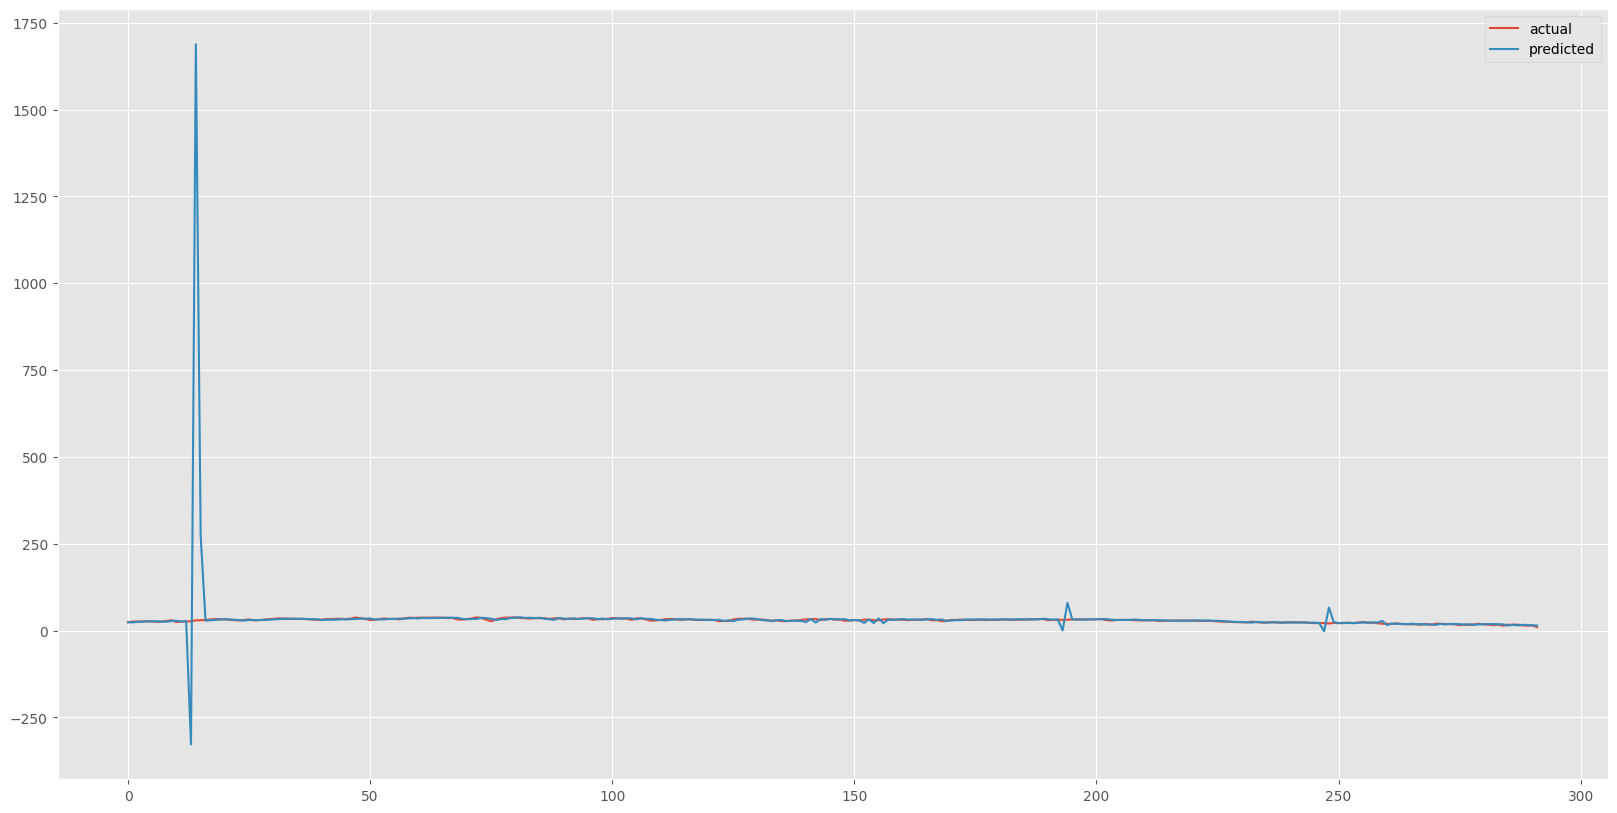

In [102]:

show_time_series_predicts(y_test, pred_y)

### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [58]:
# Write your code here. Add as many boxes as you need.
xgb_regressor = XGBRegressor()

Use the trained model to make predictions for the test set.

In [59]:
# Write your code here. Add as many boxes as you need.

In [60]:
xgb_regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.

In [61]:
xg_predict = xgb_regressor.predict(x_test)

In [62]:
regression_report(y_test, xg_predict)

Regression Report:
Mean Square Error: 4.054231316584589
R2 Score: 0.873429965981974


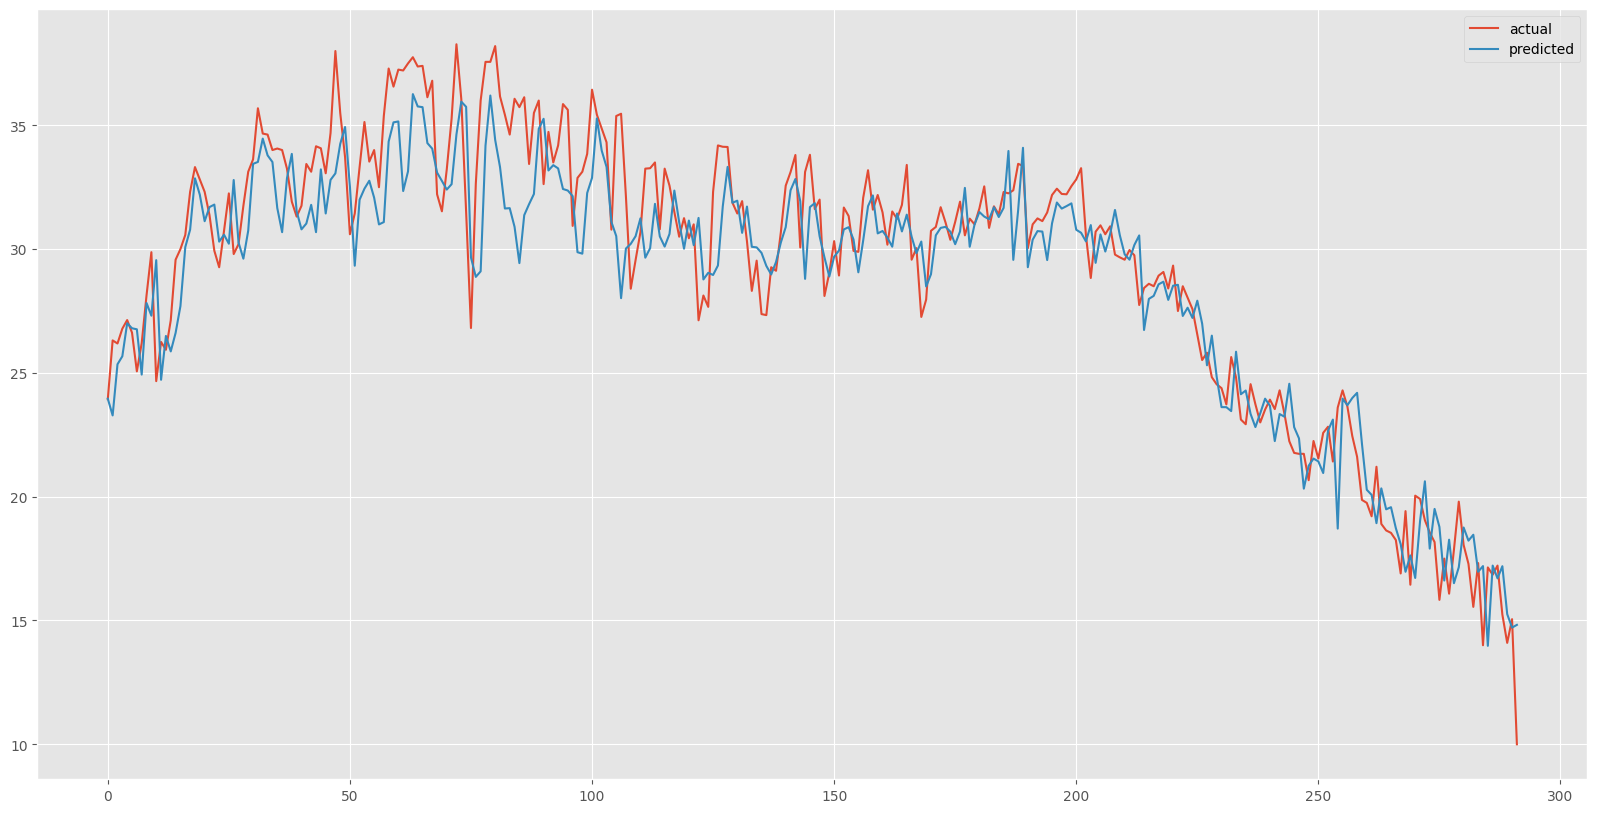

In [63]:
show_time_series_predicts(y_test, xg_predict)

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of estimators (`n_estimators`) for the XGBoost model using a cross-validation with grid search and time series split. This involves systematically experimenting with various values for `n_estimators` and evaluating the model's performance using cross-validation. Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

Hints:
- For grid search use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
- For cross-validation use the `TimeSeriesSplit` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**

In [ ]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the XGBoost Hyperparameter
Experiment with various values for `n_estimators` and evaluate the model's performance using cross-validation.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Final Assessment of the Model Performance
Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.